<a href="https://colab.research.google.com/github/bijili-parasa/projects-/blob/main/face_mask_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
dataset = "https://www.kaggle.com/datasets/omkargurav/face-mask-dataset"

In [ ]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anuradhabhanu
Your Kaggle Key: ··········


100%|██████████| 163M/163M [00:01<00:00, 169MB/s]


In [ ]:
!pip install pillow

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


In [ ]:
import os

In [ ]:
mask_files = os.listdir("/content/face-mask-dataset/data/with_mask")
print(mask_files[0:5])
print(mask_files[-5:])

['with_mask_3071.jpg', 'with_mask_399.jpg', 'with_mask_3218.jpg', 'with_mask_792.jpg', 'with_mask_1205.jpg']
['with_mask_2002.jpg', 'with_mask_2908.jpg', 'with_mask_1751.jpg', 'with_mask_3312.jpg', 'with_mask_3500.jpg']


In [ ]:
nonmask_files = os.listdir("/content/face-mask-dataset/data/without_mask")
print(nonmask_files[0:5])
print(nonmask_files[-5:])

['without_mask_1435.jpg', 'without_mask_1328.jpg', 'without_mask_2246.jpg', 'without_mask_2199.jpg', 'without_mask_125.jpg']
['without_mask_272.jpg', 'without_mask_835.jpg', 'without_mask_2585.jpg', 'without_mask_1639.jpg', 'without_mask_895.jpg']


In [ ]:
print(f'Number of with mask images:{len(mask_files)}')
print(f'Number of without mask images : {len(nonmask_files)}')

Number of with mask images:3725
Number of without mask images : 3828


In [ ]:
mask_files = [1]*3725
nonmask_files = [0]*3828
print(mask_files[0:5])
print(len(mask_files))
print(nonmask_files[0:5])
print(len(nonmask_files))


[1, 1, 1, 1, 1]
3725
[0, 0, 0, 0, 0]
3828


In [ ]:
labels = mask_files+nonmask_files
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
img= mpimg.imread("/content/face-mask-dataset/data/with_mask/with_mask_1.jpg")

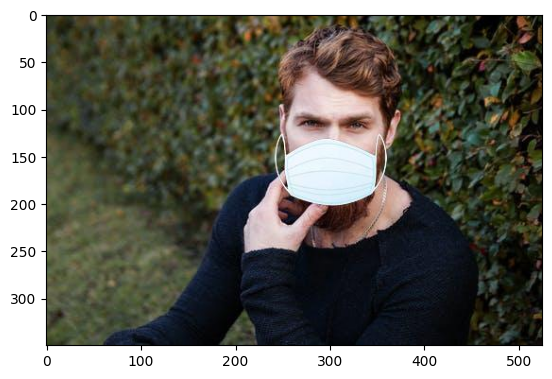

In [ ]:
imgplot = plt.imshow(img)
plt.show()

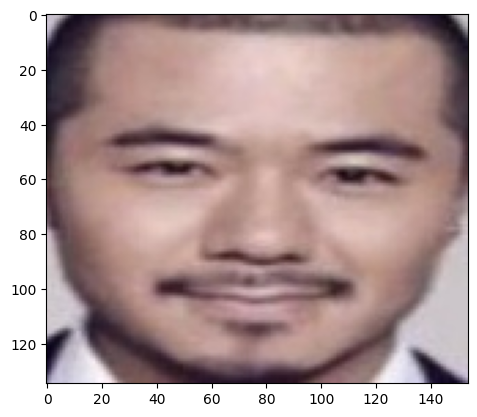

In [ ]:
img= mpimg.imread('/content/face-mask-dataset/data/without_mask/without_mask_10.jpg')
imgplot= plt.imshow(img)
plt.show()

In [ ]:
with_mask_path = '/content/face-mask-dataset/data/with_mask/'
mask_files = os.listdir(with_mask_path)

data = []

for img_file in mask_files:

  image = Image.open(with_mask_path + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
without_mask_path = '/content/face-mask-dataset/data/without_mask/'
no_mask_files = os.listdir(without_mask_path)

for img_file in no_mask_files:
  image = Image.open(without_mask_path+str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


In [ ]:



without_mask_path = '/content/face-mask-dataset/data/without_mask/'
nomask_files = os.listdir(without_mask_path)

for img_file in nomask_files:

  image = Image.open(without_mask_path + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data), len(data)

(list, 7553)

In [ ]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [210, 193, 175],
        [211, 194, 176],
        [204, 187, 169]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [198, 181, 163],
        [212, 195, 177],
        [214, 197, 179]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [199, 182, 164],
        [207, 190, 172],
        [203, 186, 168]],

       ...,

       [[101,  18,  47],
        [ 98,  15,  43],
        [ 96,  10,  39],
        ...,
        [109,  16,  45],
        [107,  18,  45],
        [105,  18,  46]],

       [[ 98,  18,  47],
        [ 97,  13,  42],
        [ 95,   8,  38],
        ...,
        [109,  16,  44],
        [110,  17,  46],
        [110,  17,  48]],

       [[ 94,  14,  43],
        [ 96,  12,  42],
        [ 98,  11,  40],
        ...,
        [111,  18,  46],
        [110,  17,  46],
        [110,  17,  48]]

In [ ]:


# converting image list and label list to numpy arrays

x = np.array(data)
y = np.array(labels)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_train[0],x_train_scaled[0]

(array([[[246, 244, 245],
         [246, 244, 245],
         [246, 244, 245],
         ...,
         [245, 239, 239],
         [245, 239, 239],
         [244, 237, 237]],
 
        [[246, 244, 245],
         [246, 244, 245],
         [246, 244, 245],
         ...,
         [245, 239, 239],
         [245, 239, 239],
         [244, 237, 237]],
 
        [[246, 244, 245],
         [246, 244, 245],
         [246, 244, 245],
         ...,
         [245, 239, 239],
         [245, 239, 239],
         [244, 237, 237]],
 
        ...,
 
        [[ 26,  26,  36],
         [ 25,  25,  35],
         [ 23,  25,  34],
         ...,
         [ 24,  27,  36],
         [ 28,  31,  40],
         [ 30,  31,  41]],
 
        [[ 25,  25,  35],
         [ 24,  24,  34],
         [ 21,  23,  32],
         ...,
         [ 24,  27,  36],
         [ 28,  31,  40],
         [ 30,  31,  40]],
 
        [[ 24,  24,  34],
         [ 24,  24,  34],
         [ 22,  24,  33],
         ...,
         [ 25,  28,  37],
  

In [ ]:
num_classes =2

In [ ]:
model = keras.Sequential()

In [ ]:
from keras.layers import Conv2D, Dense, Dropout, Flatten

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
#model.complie(optimizer ='adam',
              #loss='sparse_categorical_crossentropy',
              #metrics =[]'acucracy'],
              # compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=15)

Epoch 1/15
170/170 [==============================] - 141s 818ms/step - loss: 0.4483 - acc: 0.8038 - val_loss: 0.2796 - val_acc: 0.8727
Epoch 2/15
170/170 [==============================] - 137s 805ms/step - loss: 0.2894 - acc: 0.8814 - val_loss: 0.2407 - val_acc: 0.9025
Epoch 3/15
170/170 [==============================] - 132s 780ms/step - loss: 0.2440 - acc: 0.9027 - val_loss: 0.2351 - val_acc: 0.9041
Epoch 4/15
170/170 [==============================] - 132s 778ms/step - loss: 0.2104 - acc: 0.9200 - val_loss: 0.2017 - val_acc: 0.9140
Epoch 5/15
170/170 [==============================] - 140s 825ms/step - loss: 0.1836 - acc: 0.9294 - val_loss: 0.2640 - val_acc: 0.9157
Epoch 6/15
170/170 [==============================] - 152s 893ms/step - loss: 0.1482 - acc: 0.9422 - val_loss: 0.2131 - val_acc: 0.9306
Epoch 7/15
170/170 [==============================] - 148s 870ms/step - loss: 0.1060 - acc: 0.9588 - val_loss: 0.2609 - val_acc: 0.9240
Epoch 8/15
170/170 [============================

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 14s 289ms/step - loss: 0.2606 - acc: 0.9398
Test Accuracy = 0.9397749900817871


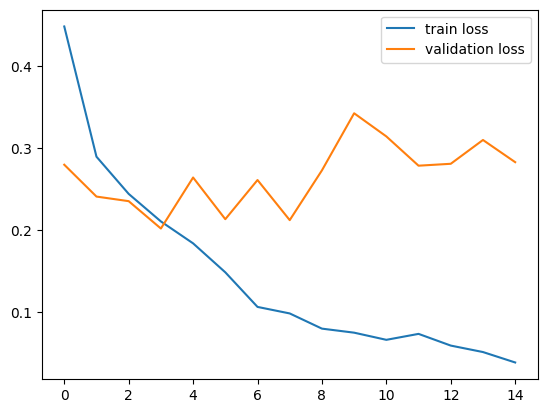

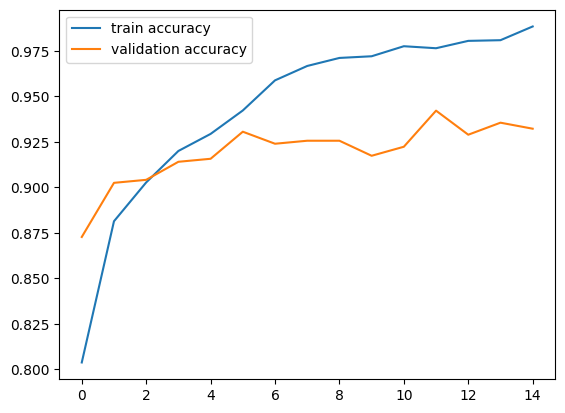

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

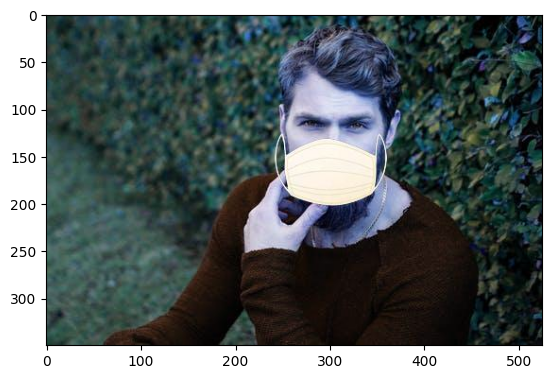

1/1 [==============================] - 0s 302ms/step
[[0.0679104  0.94775754]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = "/content/face-mask-dataset/data/with_mask/with_mask_1.jpg"
input_image = cv2.imread(input_image_path)

imgplot = plt.imshow(input_image)
plt.show()
input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(128, 128, 3), trainable=False)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
    tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224, 224))),
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
189/189 [==============================] - 191s 991ms/step - loss: 0.0796 - acc: 0.9729
Epoch 2/5
189/189 [==============================] - 235s 1s/step - loss: 0.0246 - acc: 0.9930
Epoch 3/5
189/189 [==============================] - 225s 1s/step - loss: 0.0178 - acc: 0.9957
Epoch 4/5
189/189 [==============================] - 216s 1s/step - loss: 0.0135 - acc: 0.9970
Epoch 5/5
189/189 [==============================] - 210s 1s/step - loss: 0.0111 - acc: 0.9974


In [ ]:
score, acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss ={score}')
print(f'Test Accuracy ={acc}')

48/48 [==============================] - 45s 920ms/step - loss: 0.0219 - acc: 0.9914
Test Loss =0.021870307624340057
Test Accuracy =0.991396427154541
